In [6]:
#2015-2019 datasetlerini birlesdirdim
import pandas as pd

df2015 = pd.read_csv(r'C:\Users\User\Desktop\DevLab Projects\World Happiness Index Analysis\2015.csv', sep=';')
df2015['Year'] = 2015

df2016 = pd.read_csv(r'C:\Users\User\Desktop\DevLab Projects\World Happiness Index Analysis\2016.csv', sep=';')
df2016['Year'] = 2016

df2017 = pd.read_csv(r'C:\Users\User\Desktop\DevLab Projects\World Happiness Index Analysis\2017.csv', sep=';')
df2017['Year'] = 2017

df2018 = pd.read_csv(r'C:\Users\User\Desktop\DevLab Projects\World Happiness Index Analysis\2018.csv', sep=';')
df2018['Year'] = 2018

df2019 = pd.read_csv(r'C:\Users\User\Desktop\DevLab Projects\World Happiness Index Analysis\2019.csv', sep=';')
df2019['Year'] = 2019

concat_df = pd.concat([df2015, df2016, df2017, df2018, df2019], ignore_index=True)
print(concat_df)

         Country          Region  Happiness Rank  Score      GPD   Family  \
0    Switzerland  Western Europe             1.0  7.587  139.651  134.951   
1        Iceland  Western Europe             2.0  7.561  130.232  140.223   
2        Denmark  Western Europe             3.0  7.527  132.548  136.058   
3         Norway  Western Europe             4.0  7.522    1.459  133.095   
4         Canada   North America             5.0  7.427  132.629  132.261   
..           ...             ...             ...    ...      ...      ...   
777          NaN             NaN             NaN    NaN      NaN      NaN   
778          NaN             NaN             NaN    NaN      NaN      NaN   
779          NaN             NaN             NaN    NaN      NaN      NaN   
780          NaN             NaN             NaN    NaN      NaN      NaN   
781          NaN             NaN             NaN    NaN      NaN      NaN   

      Health  Freedom  Government Corruption  Generosity  ...  Happiness.Ra

In [4]:
concat_df.describe()

,Happiness Rank,Freedom,Government Corruption,Generosity,Dystopia Residual,Year,Government.Corruption,Unnamed: 11,Unnamed: 12,GDP,Healthy
count,471.000000,626.000000,470.000000,626.000000,315.000000,782.000000,155.000000,0.0,1.000000,156.000000,156.000000
mean,78.993631,0.416428,0.131123,0.227167,199.111367,2016.993606,0.123640,NaN,0.554633,0.891449,0.597346
std,45.372758,0.156342,0.110306,0.127156,85.675318,1.417364,0.102739,NaN,NaN,0.391921,0.247579
min,1.000000,0.000000,0.000000,0.000000,0.328580,2015.000000,0.000000,NaN,0.554633,0.000000,0.000000
25%,40.000000,0.310500,0.055775,0.137263,173.798000,2016.000000,0.057271,NaN,0.554633,0.616250,0.422250
50%,79.000000,0.434635,0.097095,0.208581,214.558000,2017.000000,0.089848,NaN,0.554633,0.949500,0.644000
75%,118.000000,0.539578,0.165065,0.290915,251.010000,2018.000000,0.153296,NaN,0.554633,1.197750,0.777250
max,158.000000,0.943062,0.551910,0.838075,383.772000,2019.000000,0.464308,NaN,0.554633,2.096000,1.030000


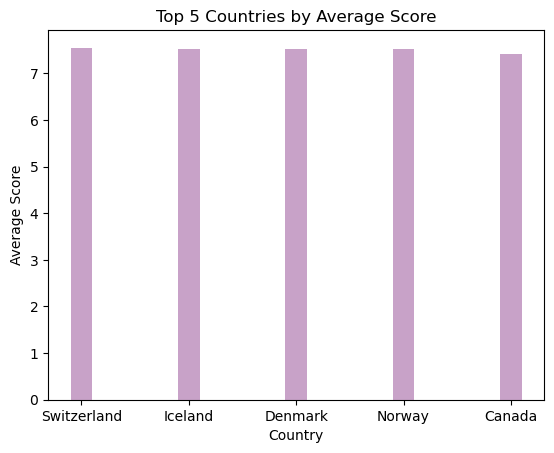

In [6]:
import matplotlib.pyplot as plt
import duckdb

con = duckdb.connect()
new_df = con.execute("""
    SELECT Country, 
           AVG(TRY_CAST(Score AS DECIMAL)) AS Avg_Score
    FROM concat_df
    WHERE TRY_CAST(Score AS DECIMAL) IS NOT NULL
    GROUP BY Country
    ORDER BY Avg_Score DESC
    LIMIT 5
""").df()

# NaN dəyərlərini çıxarmaq (əgər varsa)
new_df = new_df.dropna(subset=["Country", "Avg_Score"])

plt.bar(new_df["Country"], new_df["Avg_Score"], width=0.2, color="#C8A2C8")
plt.title("Ortalama xoşbəxtlik scoru ən yüksək olan 5 ölkə")
plt.xlabel("Ölkə")
plt.ylabel("Ortalama Score")
plt.show()


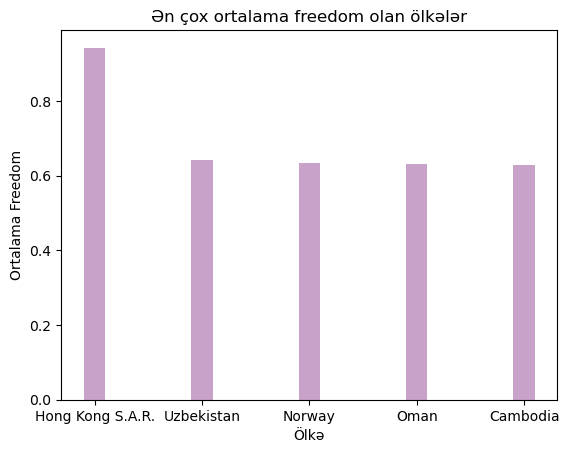

In [8]:
import matplotlib.pyplot as plt
import duckdb

con = duckdb.connect()
new_df = con.execute("SELECT Country, avg(Freedom) as avg_Freedom FROM concat_df Group by Country ORDER BY avg_Freedom DESC LIMIT 5").df()

plt.bar(new_df["Country"],new_df["avg_Freedom"], width = 0.2, color = "#C8A2C8")
plt.title("Ən çox ortalama freedom olan ölkələr")
plt.xlabel("Ölkə")
plt.ylabel("Ortalama Freedom")
plt.show()

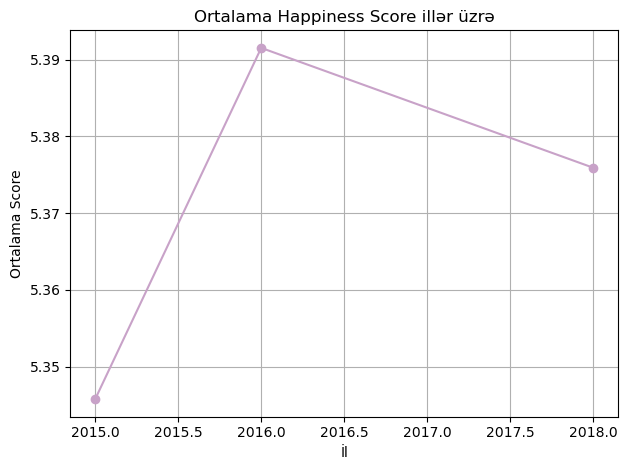

In [10]:
import matplotlib.pyplot as plt
import duckdb

con = duckdb.connect()
query = """
SELECT Year, AVG(CAST(Score AS DECIMAL)) AS Avg_Score
FROM concat_df
WHERE TRY_CAST(Score AS DECIMAL) IS NOT NULL
GROUP BY Year
ORDER BY Year
"""

new_df = con.execute(query).df()

plt.plot(new_df["Year"], new_df["Avg_Score"], marker='o', color='#C8A2C8')
plt.title("Ortalama Happiness Score illər üzrə")
plt.xlabel("İl")
plt.ylabel("Ortalama Score")
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
# Sütun adlarını dəyişdirmək
concat_df = concat_df.rename(columns={"Government.Corruption": "Corruption"})

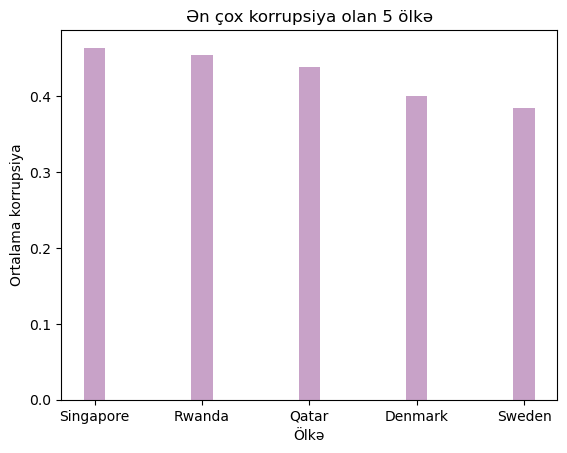

In [14]:
import matplotlib.pyplot as plt
import duckdb

con = duckdb.connect()
new_df = con.execute("SELECT Country, avg(Corruption) as Corruption FROM concat_df Group by Country ORDER BY Corruption DESC LIMIT 5").df()

plt.bar(new_df["Country"],new_df["Corruption"], width = 0.2, color = "#C8A2C8")
plt.title("Ən çox korrupsiya olan 5 ölkə")
plt.xlabel("Ölkə")
plt.ylabel("Ortalama korrupsiya")
plt.show()

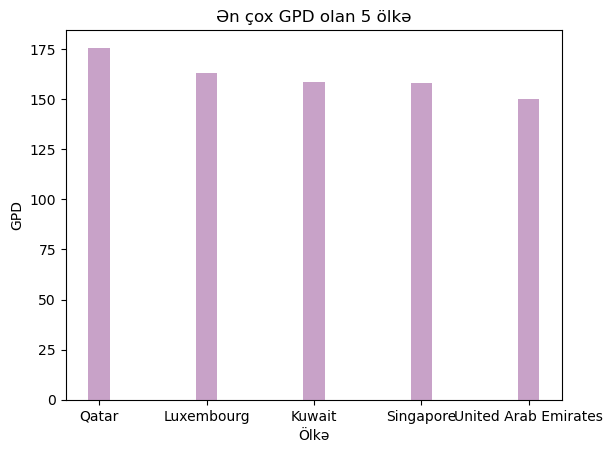

In [24]:
import matplotlib.pyplot as plt
import duckdb

con = duckdb.connect()
query = """
SELECT Country, AVG(TRY_CAST(GPD AS DOUBLE)) AS GPD
FROM concat_df
WHERE TRY_CAST(GPD AS DOUBLE) IS NOT NULL
GROUP BY Country
ORDER BY GPD DESC
LIMIT 5
"""
new_df = con.execute(query).df()

plt.bar(new_df["Country"],new_df["GPD"], width = 0.2, color = "#C8A2C8")
plt.title("Ən çox GPD olan 5 ölkə")
plt.xlabel("Ölkə")
plt.ylabel("GPD")
plt.show()

In [ ]:
pip install folium geopy

In [ ]:
import pandas as pd
import folium
from geopy.geocoders import Nominatim
import time


countries = concat_df['Country'].unique()

# Koordinatları saxlamaq üçün boş siyahı
country_coords = []

# Geolocator obyektini yaradırıq
geolocator = Nominatim(user_agent="happiness_map")

# Hər ölkə üçün koordinat tapırıq
for country in countries:
    try:
        location = geolocator.geocode(country)
        if location:
            country_coords.append({'Country': country, 'Latitude': location.latitude, 'Longitude': location.longitude})
        else:
            country_coords.append({'Country': country, 'Latitude': None, 'Longitude': None})
        time.sleep(1)  # çox sayda sorğu göndərməmək üçün gecikmə
    except:
        country_coords.append({'Country': country, 'Latitude': None, 'Longitude': None})

# DataFrame-ə çeviririk
coords_df = pd.DataFrame(country_coords)

# Əsas dataset ilə birləşdiririk
merged_df = pd.merge(concat_df, coords_df, on='Country', how='left')

# Xəritə yaradırıq
map = folium.Map(location=[20, 0], zoom_start=2)


latest_df = merged_df[merged_df['Year'] == 2019]


score_column = [col for col in latest_df.columns if 'score' in col.lower()]
if score_column:
    score_column = score_column[0]
else:
    print("Xoşbəxtlik skor sütunu tapılmadı")
    score_column = None


for _, row in latest_df.iterrows():
    if pd.notnull(row['Latitude']) and pd.notnull(row['Longitude']) and score_column:
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=5,
            popup=f"{row['Country']} - {score_column}: {row[score_column]}",
            color='blue',
            fill=True,
            fill_opacity=0.6
        ).add_to(map)

# Xəritəni HTML kimi qeyd etdim
map.save("happiness_map_2019.html")
